In [2]:
from matplotlib import pyplot as plt
import numpy as np
import astropy.units as u
from exo_finder.data_pipeline.generation.transit_generator import PlanetType, PeriodFrequency,generate_transits_from_params, generate_transit_parameters
from exo_finder.default_datasets import gaia_dataset

fields = ["gaia_id", "radius_flame", "mass_flame", "teff_mean"]
gaia_df = gaia_dataset.load_gaia_parameters_dataset().to_pandas()[fields].dropna()

Star 2155365806341678336: Radius 0.8463190793991089, Mass 0.9306282997131348, Teff 5342.15966796875


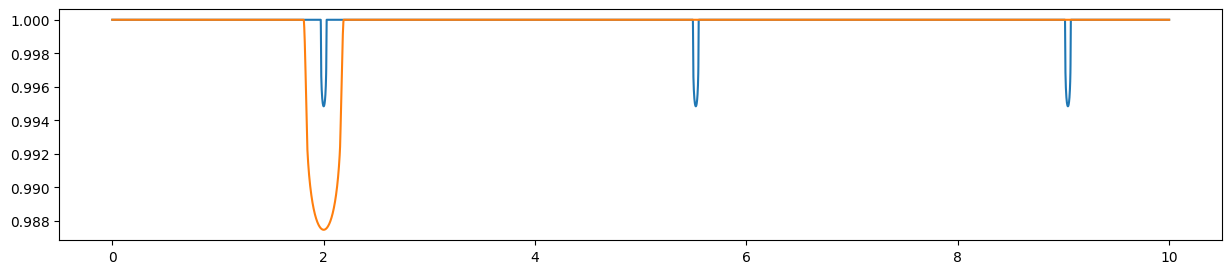

In [74]:
sample = gaia_df.sample(1)
radius, mass, teff = sample["radius_flame"].item(), sample["mass_flame"].item(), sample["teff_mean"].item()
print(f"Star {sample['gaia_id'].item()}: Radius {radius}, Mass {mass}, Teff {teff}")
mass = mass * u.solMass
radius = radius * u.solRad
teff = teff * u.K

params_e = generate_transit_parameters(
    planet_type=PlanetType.NEPTUNE,
    orbital_period_interval=PeriodFrequency.THREE_TO_TEN_DAYS,
    star_radius=radius,
    star_mass= mass,
    transit_midpoint=2,
)

params_j = generate_transit_parameters(
    planet_type=PlanetType.JUPITER,
    orbital_period_interval=(1000, 1000),
    star_radius=radius,
    star_mass= mass,
    transit_midpoint=2,
)

x = np.linspace(0, 10, 10000)
transits_e = generate_transits_from_params(params_e, x)
transits_j = generate_transits_from_params(params_j, x)

plt.figure(figsize=(15, 3))
plt.plot(x, transits_e)
plt.plot(x, transits_j)
plt.show()